In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV
from ipywidgets import interact, IntSlider
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from google.colab import autoviz

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv('nigeria_houses_data.csv')

In [ ]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [ ]:
data.shape

(24326, 8)

In [ ]:
data.isna().sum()

,0
bedrooms,0
bathrooms,0
toilets,0
parking_space,0
title,0
town,0
state,0
price,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [ ]:
data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [ ]:
for column in data.columns:
  if data[column].dtype == object:
    print(str(column))
    print(data[column].value_counts())
    print("_____________________________________________________")

title
title
Detached Duplex           13992
Terraced Duplexes          3237
Semi Detached Duplex       2615
Detached Bungalow          2108
Block of Flats             1745
Semi Detached Bungalow      452
Terraced Bungalow           177
Name: count, dtype: int64
_____________________________________________________
town
town
Lekki           10895
Ajah             2164
Ikoyi            1547
Ikeja             688
Ibeju Lekki       503
                ...  
Ethiope West        1
Jos North           1
Orile               1
Ohaji/Egbema        1
Ikpoba Okha         1
Name: count, Length: 189, dtype: int64
_____________________________________________________
state
state
Lagos          18564
Abuja           3534
Ogun             646
Oyo              478
Rivers           447
Imo              247
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Kwara              9
Nasarawa           9
Abia               9
Ekiti       

In [ ]:
data = data[data["state"]=="Lagos"]

In [ ]:
print(data[data["town"]=="Ikoyi"].max())
print(data[data["town"]=="Ifako-Ijaiye"].max())
print(data[data["town"]=="Ikeja"].max())

bedrooms                         9
bathrooms                        9
toilets                          9
parking_space                    9
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
bedrooms                         7
bathrooms                        8
toilets                          8
parking_space                    8
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object
bedrooms                         9
bathrooms                        9
toilets                          9
parking_space                    9
title            Terraced Duplexes
town                         Ikeja
state                        Lagos
price                 1440000000.0
dtype: object


In [ ]:
data['title'].unique()

array(['Detached Duplex', 'Semi Detached Duplex', 'Detached Bungalow',
       'Terraced Duplexes', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [ ]:
data['state'].unique()

array(['Lagos'], dtype=object)

<Axes: xlabel='state'>

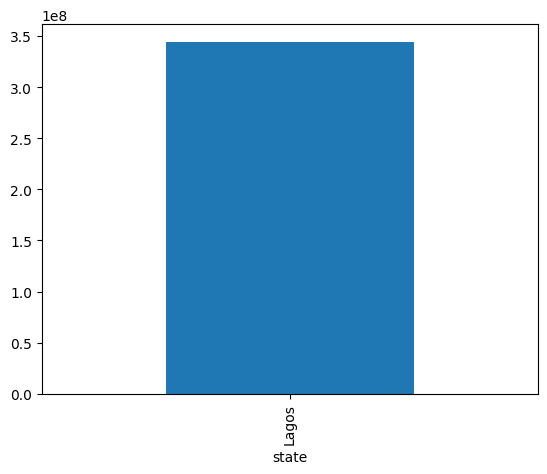

In [ ]:
data.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='town'>

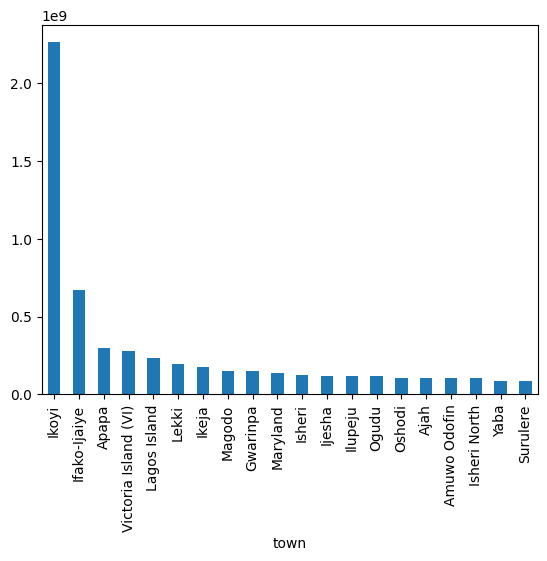

In [ ]:
data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [ ]:
trimmed_data = q1, q9 = data["price"].quantile([0.15,0.85])
mask_data = data["price"].between(q1,q9)
trimmed_data = data[mask_data]
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0
8,1,1,1,1,Detached Duplex,Lekki,Lagos,200000000.0
9,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000.0
...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [ ]:
trimmed_data['town'].unique()

array(['Lekki', 'Ajah', 'Victoria Island (VI)', 'Magodo', 'Agege',
       'Ikeja', 'Isheri', 'Ikoyi', 'Ejigbo', 'Isolo', 'Ojodu', 'Shomolu',
       'Ogudu', 'Surulere', 'Alimosho', 'Ibeju Lekki', 'Maryland',
       'Gbagada', 'Idimu', 'Ikotun', 'Ikorodu', 'Isheri North', 'Yaba',
       'Kosofe', 'Ilupeju', 'Ifako-Ijaiye', 'Ipaja', 'Ketu', 'Ojota',
       'Oshodi', 'Amuwo Odofin', 'Ojo', 'Lagos Island', 'Gwarinpa',
       'Mushin', 'Agbara-Igbesa', 'Ayobo', 'Ijaiye', 'Apapa', 'Badagry',
       'Ijesha'], dtype=object)

In [ ]:
records = trimmed_data['state'].value_counts()
records

,count
state,
Lagos,13190


In [ ]:
#remove some state from the entry
trimmed_data = trimmed_data[~trimmed_data['state'].isin(records[records < 100].index)]

In [ ]:
trimmed_data['state'].value_counts()

,count
state,
Lagos,13190


<Axes: title={'center': 'Most Expensive towns in nigeria'}, xlabel='town'>

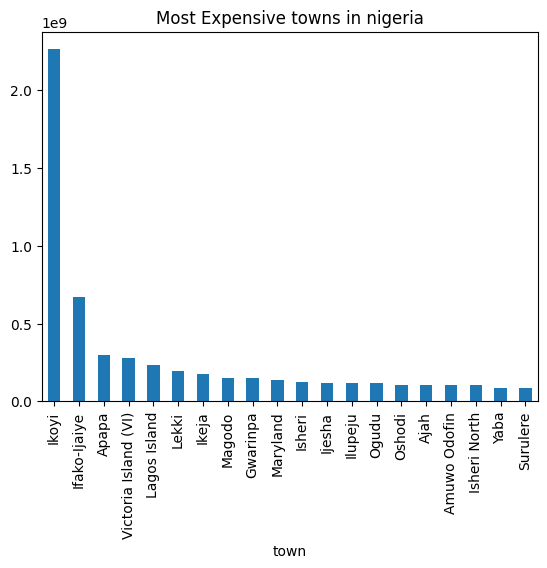

In [ ]:
data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title="Most Expensive towns in nigeria")

In [ ]:
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0
...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [ ]:
data['total_rooms'] = data['bedrooms'] + data['bathrooms'] + data['toilets'] + data['parking_space']

In [ ]:
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,18
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,19
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,15
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,17
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0,18
...,...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110000000.0,18
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0,16
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0,18
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14


In [ ]:
T_df=pd.DataFrame(data)
T_df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,18
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,19
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,15
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,17
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0,18
...,...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110000000.0,18
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0,16
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0,18
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14


In [ ]:
for i in data.columns:
  print(i, ":", data[i].unique().tolist())

bedrooms : [4, 5, 2, 1, 6, 3, 9, 7, 8]
bathrooms : [5, 4, 2, 1, 6, 3, 8, 7, 9]
toilets : [5, 6, 3, 1, 7, 4, 8, 2, 9]
parking_space : [4, 6, 2, 1, 5, 3, 7, 8, 9]
title : ['Detached Duplex', 'Semi Detached Duplex', 'Detached Bungalow', 'Terraced Duplexes', 'Block of Flats', 'Semi Detached Bungalow', 'Terraced Bungalow']
town : ['Lekki', 'Ajah', 'Epe', 'Victoria Island (VI)', 'Ikeja', 'Ikoyi', 'Magodo', 'Ibeju Lekki', 'Yaba', 'Ifako-Ijaiye', 'Agege', 'Ikorodu', 'Isheri North', 'Isheri', 'Ipaja', 'Mushin', 'Ejigbo', 'Isolo', 'Ojodu', 'Alimosho', 'Shomolu', 'Ogudu', 'Surulere', 'Ayobo', 'Ikotun', 'Maryland', 'Gbagada', 'Idimu', 'Ojo', 'Kosofe', 'Ilupeju', 'Ketu', 'Ojota', 'Oshodi', 'Amuwo Odofin', 'Ijede', 'Agbara-Igbesa', 'Ijaiye', 'Apapa', 'Lagos Island', 'Gwarinpa', 'Badagry', 'Oke-Odo', 'Egbe', 'Orile', 'Eko Atlantic City', 'Imota', 'Ijesha', 'Ibeju']
state : ['Lagos']
price : [120000000.0, 40000000.0, 75000000.0, 450000000.0, 65000000.0, 12000000.0, 200000000.0, 60000000.0, 70000000.0,

In [ ]:
for column in data.columns:
  if data[column].dtype == object:
    print(str(column))
    print(data[column].value_counts())
    print("_____________________________________________________")

title
title
Detached Duplex           11822
Semi Detached Duplex       2121
Terraced Duplexes          2119
Block of Flats             1067
Detached Bungalow          1064
Semi Detached Bungalow      259
Terraced Bungalow           112
Name: count, dtype: int64
_____________________________________________________
town
town
Lekki                   10895
Ajah                     2164
Ikoyi                    1547
Ikeja                     688
Ibeju Lekki               503
Victoria Island (VI)      496
Magodo                    375
Ikorodu                   241
Isheri North              194
Isolo                     176
Alimosho                  146
Agege                     124
Surulere                  122
Ojodu                      91
Yaba                       87
Ipaja                      85
Ifako-Ijaiye               85
Ikotun                     76
Maryland                   65
Gbagada                    56
Ogudu                      43
Amuwo Odofin               42
Ojo           

Exploring Outliners

In [ ]:
data[(data['toilets'] == 9) & (data["bedrooms"] < 4) ].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
126,2,5,9,4,Detached Bungalow,Ibeju Lekki,Lagos,3.000000e+07,20
5574,3,9,9,6,Block of Flats,Agege,Lagos,3.500000e+07,27
6566,1,8,9,4,Detached Duplex,Victoria Island (VI),Lagos,1.400000e+09,22
14846,3,9,9,9,Detached Duplex,Ikorodu,Lagos,4.500000e+07,30


In [ ]:
# apartments with less than 4 bedrooms with 8 toilets
data[(data['toilets'] == 8) & (data["bedrooms"] < 3) ].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2525,2,8,8,4,Block of Flats,Ajah,Lagos,45000000.0,22
13626,1,6,8,4,Detached Bungalow,Ikorodu,Lagos,45000000.0,19
15333,2,5,8,4,Block of Flats,Agege,Lagos,27999999.0,19
15965,1,1,8,1,Semi Detached Duplex,Isolo,Lagos,120000000.0,11
16971,2,8,8,4,Block of Flats,Ketu,Lagos,40000000.0,22


In [ ]:
# apartments with less than 3 bedrooms with 7 toilets
data[(data['toilets'] == 7) & (data["bedrooms"] < 3) ].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
14917,1,7,7,1,Terraced Bungalow,Alimosho,Lagos,80000000.0,16


In [ ]:
# apartments with less than 4 bedrooms with 8 toilets
data[(data['toilets'] == 6) & (data["bedrooms"] < 2) ].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms


In [ ]:
# apartments with 9 bedrooms having less than 4 toilets
data[(data['bedrooms'] == 9) & (data["toilets"] < 4)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
183,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,20
360,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,20
366,9,9,1,8,Detached Duplex,Lekki,Lagos,250000000.0,27
640,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,20
658,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,20


In [ ]:
# apartments with 8 bedrooms having less than 3 toilets
data[(data['bedrooms'] == 8) & (data["toilets"] <3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
3322,8,8,1,5,Detached Duplex,Ajah,Lagos,40000000.0,22
7180,8,8,1,1,Detached Duplex,Ikoyi,Lagos,750000000.0,18
7634,8,1,1,1,Block of Flats,Ajah,Lagos,65000000.0,11
8760,8,1,1,2,Detached Duplex,Victoria Island (VI),Lagos,380000000.0,12
11844,8,8,1,4,Detached Duplex,Ikoyi,Lagos,650000000.0,21


In [ ]:
# apartments with 7 bedrooms having less than 3 toilets
data[(data['bedrooms'] == 7) & (data["toilets"] <3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
1013,7,7,1,6,Detached Duplex,Ojo,Lagos,2.500000e+07,21
4193,7,7,1,1,Detached Duplex,Ikeja,Lagos,7.000000e+08,16
6706,7,9,1,1,Detached Duplex,Ikoyi,Lagos,1.000000e+09,18
7076,7,5,1,2,Detached Duplex,Lekki,Lagos,2.700000e+08,15
9589,7,5,1,4,Detached Duplex,Ajah,Lagos,4.500000e+07,17


In [ ]:
# apartments with 6 bedrooms having less than 3 toilets
data[(data['bedrooms'] == 6) & (data["toilets"] <2)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
5035,6,1,1,5,Detached Duplex,Isheri North,Lagos,140000000.0,13
5615,6,1,1,1,Detached Duplex,Ikeja,Lagos,490000000.0,9
12174,6,8,1,1,Detached Duplex,Isheri North,Lagos,150000000.0,16
13949,6,1,1,4,Detached Duplex,Ikeja,Lagos,550000000.0,12
14718,6,8,1,4,Detached Duplex,Isheri North,Lagos,155000000.0,19


In [ ]:
# dropping these extreme rows
data.drop(data[(data['toilets'] == 9) & (data["bedrooms"] < 4)].index.to_list(), axis=0, inplace=True)
data.drop(data[(data['toilets'] == 8) & (data["bedrooms"] < 3)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['toilets'] == 7) & (data["bedrooms"] < 2)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['toilets'] == 6) & (data["bedrooms"] < 2)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['bedrooms'] == 9) & (data["toilets"]<4)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['bedrooms'] == 8) & (data["toilets"]<3)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['bedrooms'] == 7) & (data["toilets"]<3)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['bedrooms'] == 6) & (data["toilets"]<2)].index.to_list(),axis=0, inplace=True)

In [ ]:
data.shape

(18435, 9)

Bathrooms vs Bedrooms

In [ ]:
# apartments with 8 bathrooms having less than 3 bedrooms
data[(data['bathrooms'] == 8) & (data["bedrooms"] < 3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
9786,1,8,1,6,Block of Flats,Ijaiye,Lagos,45000000.0,16


In [ ]:
# apartments with 9 bedrooms having less than 4 bathrooms
data[(data['bedrooms'] == 9) & (data["bathrooms"] < 4)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
8592,9,3,6,4,Detached Duplex,Ajah,Lagos,200000000.0,22
23393,9,1,9,9,Detached Duplex,Ojo,Lagos,50000000.0,28


In [ ]:
# apartments with 8 bedrooms having less than 4 bathrooms
data[(data['bedrooms'] == 8) & (data["bathrooms"] < 4)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms


In [ ]:
# apartments with 7 bedrooms having less than 3 bathrooms
data[(data['bedrooms'] == 7) & (data["bathrooms"] < 3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms


In [ ]:
# apartments with 6 bedrooms having less than 3 bathrooms
data[(data['bedrooms'] == 6) & (data["bathrooms"] < 3)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
5796,6,2,2,6,Detached Bungalow,Idimu,Lagos,10000000.0,16
8304,6,2,2,8,Detached Bungalow,Alimosho,Lagos,15000000.0,18
17304,6,2,2,1,Detached Bungalow,Ikotun,Lagos,12000000.0,11
19654,6,2,2,5,Semi Detached Bungalow,Agege,Lagos,6000000.0,15
21129,6,2,6,4,Semi Detached Bungalow,Ikorodu,Lagos,16000000.0,18


In [ ]:
# dropping these extreme rows
data.drop(data[(data['bathrooms'] == 8) & (data["bedrooms"] < 3)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['bedrooms'] == 9) & (data["bathrooms"] < 4)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['bedrooms'] == 8) & (data["bathrooms"] < 4)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['bedrooms'] == 7) & (data["bathrooms"] < 3)].index.to_list(),axis=0, inplace=True)
data.drop(data[(data['bedrooms'] == 6) & (data["bathrooms"] < 3)].index.to_list(),axis=0, inplace=True)

In [ ]:
data.shape

(18426, 9)

Toilets VS Bathrooms

In [ ]:
# apartments where bathrooms > 6 and toilets < 3 or bathrooms < 3 and toilets > 6
data[((data['bathrooms'] > 6) & (data["toilets"] < 3)) | ((data['bathrooms'] < 3) & (data["toilets"] > 6))].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
9627,4,8,1,7,Detached Duplex,Maryland,Lagos,150000000.0,20
16860,5,1,9,4,Detached Duplex,Ikorodu,Lagos,40000000.0,19
17601,3,8,1,6,Block of Flats,Ojo,Lagos,28000000.0,18
23157,5,2,7,4,Detached Duplex,Ibeju Lekki,Lagos,107000000.0,18


In [ ]:
# dropping these extreme rows
data.drop(data[((data['bathrooms'] > 6) & (data["toilets"] < 3)) | ((data['bathrooms'] < 3) & (data["toilets"] > 6))].index.to_list(),
        inplace=True, axis=0)
data.shape

(18422, 9)

In [ ]:
numerical_data = trimmed_data.select_dtypes(include=['int64', 'float64'])
numerical_data

,bedrooms,bathrooms,toilets,parking_space,price
2,4,5,5,4,120000000.0
4,4,4,5,2,75000000.0
6,4,5,5,4,65000000.0
8,1,1,1,1,200000000.0
9,4,4,5,5,60000000.0
...,...,...,...,...,...
24318,4,5,5,4,110000000.0
24320,3,4,4,5,80000000.0
24323,4,5,5,4,68000000.0
24324,3,4,4,3,78000000.0


In [ ]:
numerical_data.corr()

,bedrooms,bathrooms,toilets,parking_space,price
bedrooms,1.000000,0.759368,0.471680,0.151025,0.302229
bathrooms,0.759368,1.000000,0.536165,0.161942,0.233862
toilets,0.471680,0.536165,1.000000,0.286315,0.269676
parking_space,0.151025,0.161942,0.286315,1.000000,0.184715
price,0.302229,0.233862,0.269676,0.184715,1.000000


<Axes: >

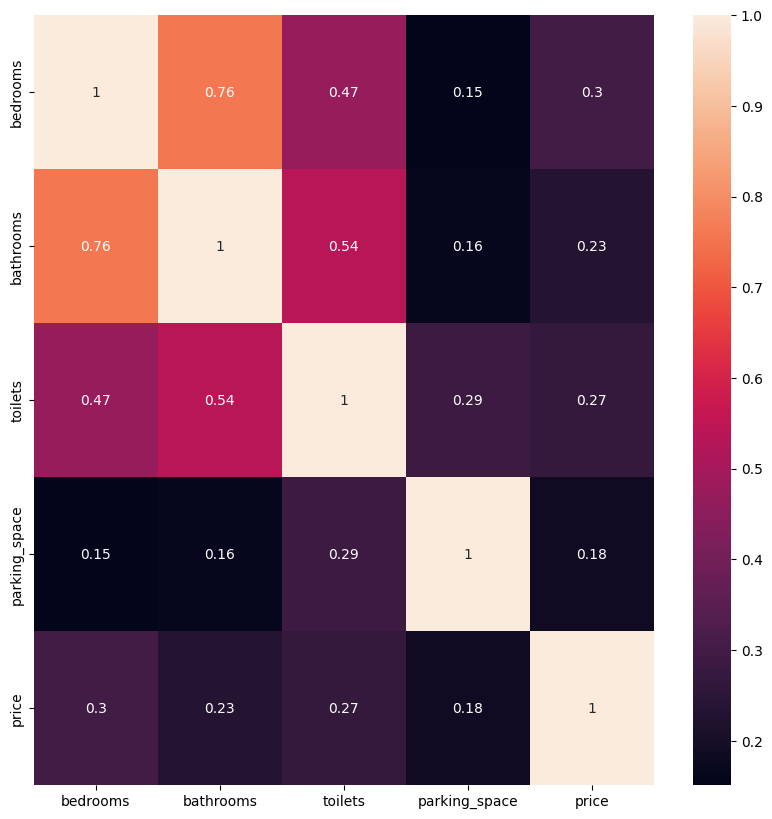

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_data.corr(), annot=True)

In [ ]:
numerical_data.corr()

,bedrooms,bathrooms,toilets,parking_space,price
bedrooms,1.000000,0.759368,0.471680,0.151025,0.302229
bathrooms,0.759368,1.000000,0.536165,0.161942,0.233862
toilets,0.471680,0.536165,1.000000,0.286315,0.269676
parking_space,0.151025,0.161942,0.286315,1.000000,0.184715
price,0.302229,0.233862,0.269676,0.184715,1.000000


In [ ]:
trimmed_data.drop(columns=['title', 'town', 'state'], inplace = True)

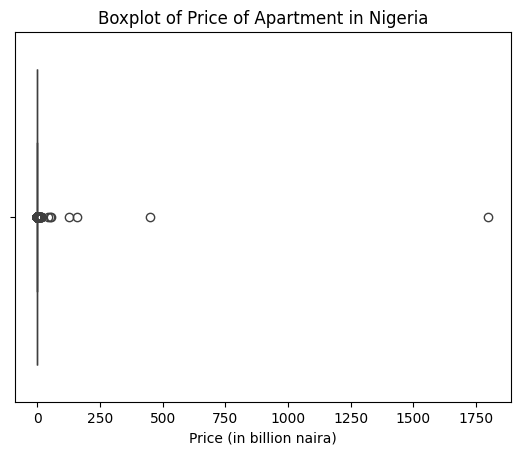

In [ ]:
sns.boxplot(x=data["price"]/1e9, orient="h")
plt.xlabel("Price (in billion naira)")
plt.title("Boxplot of Price of Apartment in Nigeria");

In [ ]:
#The apartment with the minimum price
data[data["price"] == data["price"].min()]

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2693,2,3,3,4,Terraced Duplexes,Ibeju Lekki,Lagos,90000.0,12


Removing the outliners

In [ ]:
trim = q1, q9 = trimmed_data["price"].quantile([0.1, 0.9])
mask = trimmed_data["price"].between(q1,q9)
data = trimmed_data[mask]

In [ ]:
data

,bedrooms,bathrooms,toilets,parking_space,price
2,4,5,5,4,120000000.0
4,4,4,5,2,75000000.0
6,4,5,5,4,65000000.0
9,4,4,5,5,60000000.0
12,4,5,6,3,65000000.0
...,...,...,...,...,...
24318,4,5,5,4,110000000.0
24320,3,4,4,5,80000000.0
24323,4,5,5,4,68000000.0
24324,3,4,4,3,78000000.0


In [ ]:
data[data["price"] == data["price"].min()]

,bedrooms,bathrooms,toilets,parking_space,price
39,4,4,5,4,55000000.0
49,4,4,4,3,55000000.0
110,3,5,5,4,55000000.0
182,3,3,4,4,55000000.0
231,4,4,5,2,55000000.0
...,...,...,...,...,...
24034,4,4,5,2,55000000.0
24119,4,4,5,3,55000000.0
24126,4,4,5,5,55000000.0
24150,4,4,5,4,55000000.0


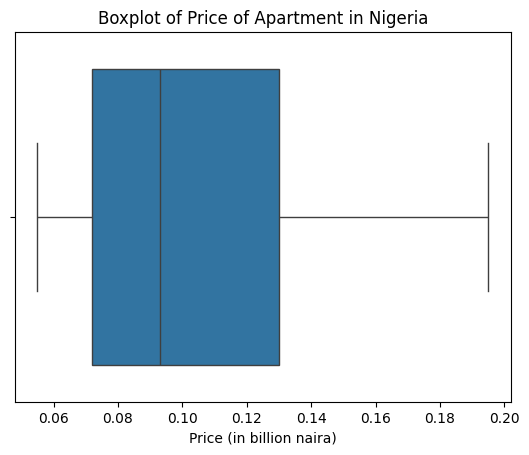

In [ ]:
sns.boxplot(x=data["price"]/1e9, orient="h")
plt.xlabel("Price (in billion naira)")
plt.title("Boxplot of Price of Apartment in Lagos");

<Axes: >

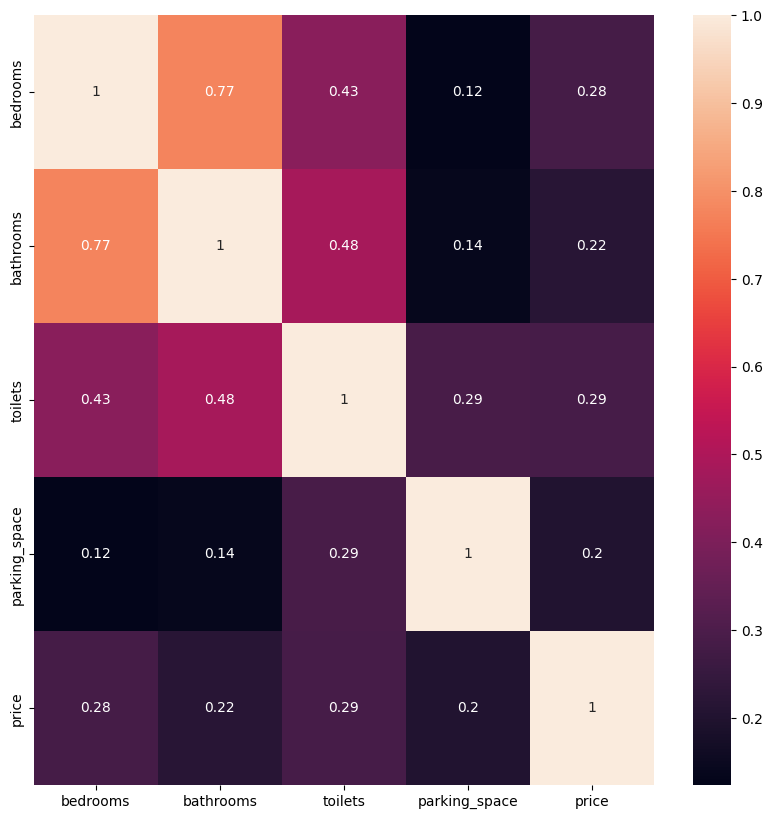

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [ ]:
#construct a barplot showing the mean and median house prices for each state.
bar_data = pd.melt(data.reset_index().iloc[:,[0,2,3]], id_vars="state")
sns.barplot(x=bar_data["state"], y=bar_data["value"]/1e6, hue=bar_data["variable"], palette=sns.palettes.color_palette("gray", 2))
plt.xlabel("State")
plt.ylabel("Price (in million naira)")
plt.title("Barplot of the Average House Prices in Nigeria");

KeyError: 'state'

In [ ]:
#barplot of the distribution of house title
data["title"].value_counts(normalize=True).sort_values().plot.barh(xlabel="Frequency (count)", color="silver",
ylabel="Title", title="Barplot of House Title");

KeyError: 'title'

**Model Building and Selection**

In [ ]:
X = trimmed_data.drop('price', axis = 1)
y = trimmed_data['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
y_pred_base = [y_train.mean()] * len(y_train)

print(f"Baseline R-square: {r2_score(y_train, y_pred_base)}")
print(f"Baseline Model MAE (training): N{mean_absolute_error(y_train, y_pred_base):,.2f}")
print(f"Baseline Model MAE (test): N{mean_absolute_error(y_test, [y_train.mean()] * len(y_test)):,.2f}")

Baseline R-square: 0.0
Baseline Model MAE (training): N44,516,754.80
Baseline Model MAE (test): N45,026,194.76


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


In [ ]:
f'MAE: {mae}'

'MAE: 40509889.31976605'

In [ ]:
f'MSE: {mse}'

'MSE: 2738927042856092.0'

In [ ]:
f'RMSE: {rmse}'

'RMSE: 52334759.413377374'

In [ ]:
f'R2: {r2}'

'R2: 0.11362032502057906'

In [ ]:
def grid_search_cv(X_train, X_test, y_train, y_test):

    models_dict = {
                    "Ridge": {
                        "params": { "ridge__alpha": [1e-5, 1e-2, 1e-1, 1, 5, 10]},
                        "estimator": make_pipeline(OneHotEncoder(), Ridge(random_state=42))
                    },
                    "DecisionTreeRegressor":{
                        "params":{"decisiontreeregressor__max_depth": [2, 4, 10, 20] },
                        "estimator": make_pipeline(OrdinalEncoder(), DecisionTreeRegressor(random_state=42))
                    },
                        "RandomForestRegressor":{
                        "params": {"randomforestregressor__max_depth": [2, 4, 10, 50],
                                "randomforestregressor__n_estimators": [5, 20, 50, 100, 200]},
                        "estimator": make_pipeline(OrdinalEncoder(), RandomForestRegressor(random_state=42, n_jobs=-1))
                    },
                        "GradientBoostingRegressor":{
                        "params":{"gradientboostingregressor__max_depth": [2, 4, 10, 50],
                                "gradientboostingregressor__alpha": [1e-10, 1e-2, 0.5, 0.9],
                                "gradientboostingregressor__n_estimators": [5, 20, 50, 100, 200]},
                        "estimator": make_pipeline(OrdinalEncoder(), GradientBoostingRegressor(random_state=42))
                    },
                    "SVR": {
                        "params": {
                            "svr__kernel": ["linear", "poly", "rbf", "sigmoid"]},
                            "estimator": make_pipeline(OrdinalEncoder(), SVR())
                    },
                    "KNeighborsRegressor": {
                        "params": {
                            "kneighborsregressor__n_neighbors": [3, 5, 7, 10, 15, 30],
                            "kneighborsregressor__weights": ["uniform", "distance"]},
                            "estimator": make_pipeline(OneHotEncoder(), KNeighborsRegressor())
                    }
                }


    model_eval_dict = {"model_name":[], "best_parameter":[], "mae":[], "test_mae":[], "r_square":[]}

    for each_model in models_dict:
        each_model_dict = models_dict[each_model]
        params = each_model_dict["params"]
        estimator=each_model_dict["estimator"]
        model_lag = GridSearchCV(param_grid=params, estimator=estimator, cv=5, scoring="neg_mean_absolute_error")
        model_lag.fit(X_train, y_train)

        test_mae = mean_absolute_error(y_test, model_lag.predict(X_test)).astype(int)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        model_eval_dict["model_name"].append(each_model)
        model_eval_dict["best_parameter"].append(model_lag.best_params_)
        model_eval_dict["mse"].append(np.abs(mse).astype(int))
        model_eval_dict["test_mae"].append(test_mae)
        model_eval_dict["r_square"].append(r2_score(y_train, model_lag.predict(X_train)))

    model_eval_df = pd.DataFrame(model_eval_dict).set_index("model_name")


    return model_eval_df

In [ ]:
model_eval_df = grid_search_cv(X_train, X_test, y_train, y_test)
model_eval_df

,best_parameter,train_mae,test_mae,r_square
model_name,,,,
Ridge,{'ridge__alpha': 0.01},37430704,38067066,0.191658
DecisionTreeRegressor,{'decisiontreeregressor__max_depth': 4},37488286,37985954,0.193097
RandomForestRegressor,"{'randomforestregressor__max_depth': 4, 'rando...",37402276,37890131,0.197013
GradientBoostingRegressor,"{'gradientboostingregressor__alpha': 1e-10, 'g...",37352558,37923636,0.201934
SVR,{'svr__kernel': 'poly'},42543075,42692689,-0.082796
KNeighborsRegressor,"{'kneighborsregressor__n_neighbors': 30, 'knei...",37180935,37749132,0.181728


In [ ]:
gbr = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [150, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3]
}

grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 5, n_jobs = -1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150, 100, 200]})

In [ ]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
    # Add other hyperparameters to explore
}

random_search = RandomizedSearchCV(gbr, param_distributions, n_iter=100, cv = 5, n_jobs = -1)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]})

In [ ]:
best_grid_randCV = random_search.best_estimator_
best_grid_randCV

GradientBoostingRegressor(max_features='log2', min_samples_leaf=4,
                          min_samples_split=5)

In [ ]:
def make_prediction(bedrooms, bathrooms, toilets, total_rooms):

    data = {"bedrooms":bedrooms,
            "bathrooms":bathrooms,
            "toilets":toilets,
            "total_rooms":total_rooms
    }

    df = pd.DataFrame(data, index=[0])
    prediction = best_grid_randCV.predict(df)
    return f"Predicted apartment price: ₦{prediction}"

In [ ]:
make_prediction(bedrooms = 3, bathrooms = 4,toilets = 2, total_rooms = 7)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- total_rooms


In [ ]:
custom_font_style = {
    'font-family': 'Arial',
    'font-size': '20px'
}

interact(
    make_prediction,
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
        style=custom_font_style
    ),
    bathrooms=IntSlider(
        min=X_train["bathrooms"].min(),
        max=X_train["bathrooms"].max(),
        step=1,
        value=X_train["bathrooms"].mean(),
        style=custom_font_style
    ),
    toilets=IntSlider(
        min=X_train["toilets"].min(),
        max=X_train["toilets"].max(),
        step=1,
        value=X_train["toilets"].mean(),
        style=custom_font_style
    ),
    total_rooms=IntSlider(
        min=X_train["total_rooms"].min(),
        max=X_train["total_rooms"].max(),
        step=1,
        value=X_train["total_rooms"].mean(),
        style=custom_font_style
    )

);

KeyError: 'total_rooms'